# **Task 2 - Predict customer buying behaviour:**

Customers are more empowered than ever because they have access to a wealth
of information at their fingertips. This is one of the reasons the buying cycle is very
different to what it used to be. Today, if you’re hoping that a customer purchases
your flights or holidays as they come into the airport, you’ve already lost! Being
reactive in this situation is not ideal; airlines must be proactive in order to acquire
customers before they embark on their holiday.
This is possible with the use of data and predictive models. The most important
factor with a predictive model is the quality of the data you use to train the
machine learning algorithms. For this task, you must manipulate and prepare the
provided customer booking data so that you can build a high-quality predictive
model.
With your predictive model, it is important to interpret the results in order to
understand how “predictive” the data really was and whether we can feasibly use
it to predict the target outcome (customers buying holidays). Therefore, you
should evaluate the model's performance and output how each variable
contributes to the predictive model's power.

# **Steps:**

1. Importing the Required libraries
2. Import the Dataset
3. Exploratory Data Analysis
4. Creat a Model
5. Make Prediction

# 1. import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
import chardet

# 2. Import the Data sets

In [ ]:
data = '/content/drive/MyDrive/Customer_Booking.csv'

In [ ]:
with open('/content/drive/MyDrive/Customer_Booking.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
print(result)

{'encoding': 'utf-8', 'confidence': 0.938125, 'language': ''}


In [ ]:
df = pd.read_csv(data, encoding='ISO-8859-1')

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# 3. Exploratory Data Analysis

In [ ]:
# checking the the vital information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df.shape

(50000, 14)

In [ ]:
#check if there is any null value in any of the columns
df.isnull().sum()
# we don't have any null value

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [ ]:
# check for datatypes of all the colums
df.dtypes
#All our columns are corespondent to their dtype

,0
num_passengers,int64
sales_channel,object
trip_type,object
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,object
route,object
booking_origin,object
wants_extra_baggage,int64


In [ ]:
df.booking_complete.value_counts()

,count
booking_complete,
0,42522
1,7478


# *Mutual Information*

Mutual Information (MI) is a measure from information theory that quantifies the amount of information shared between two random variables. In data science, it is used to evaluate the dependency or association between variables

In [ ]:
#changing object dtype to int dtype
x = df.drop('booking_complete', axis = 1)
y = df['booking_complete']

for col in x.select_dtypes('object'):
  x[col], _ = x[col].factorize()

In [ ]:
x.dtypes

,0
num_passengers,int64
sales_channel,int64
trip_type,int64
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,int64
route,int64
booking_origin,int64
wants_extra_baggage,int64


In [ ]:
mi_scores = mutual_info_classif(x, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

,MI Scores
route,0.053269
booking_origin,0.048277
flight_duration,0.015345
wants_extra_baggage,0.008090
length_of_stay,0.007089
wants_in_flight_meals,0.004884
wants_preferred_seat,0.003802
purchase_lead,0.002843
flight_day,0.002162
num_passengers,0.001680


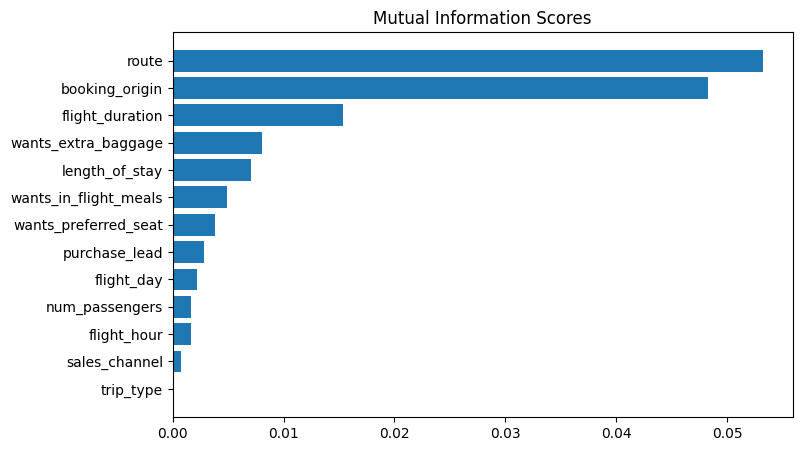

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

**we can see that:**

1. route
2. booking origin
3. flight duration
4. wants extra baggage
5. length of stay


are the top five features which are fully dependent upon booking complete feature.

# 4. create a model

In [ ]:
#test train split
# dataset split
# creating a function for dataset split
def dataset(x,y):
    train_full_x, val_x, train_full_y, val_y = train_test_split(x, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_x, test_x, train_y, test_y = train_test_split(train_full_x, train_full_y, test_size=0.25,random_state = 0)
    return (train_x, val_x, train_y, val_y)


In [ ]:
def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

# Model 1 : Random forest classifier with top 6 features

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))


ACCURACY:  83.36
AUC score:  0.5657818407546988


# Model 2 : Random forest classifier with all features

In [ ]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.76
AUC score:  0.5479604084813514


# Model 3 : XGB classifier with top 6 features

In [ ]:
from xgboost import XGBClassifier

X= df[features]

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)

y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.72
AUC score:  0.5189398567740671


# Model 4 : XGB classifier with all features

In [ ]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))



ACCURACY:  84.98
AUC score:  0.5424676175552812


Finalizing that random forest model with all features as final model, as it has good accuracy and higher auc score compared to other models

*Validating with test data set*

In [ ]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.2,random_state = 0)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(train_full_X, train_full_y)
preds= forest_model.predict(test_X)

print('ACCURACY: ',accuracy_score(test_y,preds)*100)
print('AUC score: ',roc_auc_score(test_y,preds))

ACCURACY:  85.09
AUC score:  0.5577796717361984
